In [25]:
import numpy as np
import pandas as pd

#kmeans
from sklearn.cluster import KMeans

#plot stuff
import matplotlib.pyplot as mpl

#tsne
from sklearn.manifold import TSNE

#pca 
from sklearn.decomposition import PCA

In [26]:
#get count table
counts = pd.read_csv("mouseCounts.csv")
print(counts.shape)
counts = counts.values[1:counts.shape[0],1:]

(18294, 3006)


In [ ]:
#set colors to real cell types
real = pd.read_csv("realMouse.csv")

r = [None]*3005

for i in range(len(real.values[:,1])):
    if real.values[i,1] == "astrocytes_ependymal":
        r[i] = '#ff0000'
    if real.values[i,1] == "endothelial-mural":
        r[i] = '#ff6f00'
    if real.values[i,1] == "interneurons":
        r[i] = '#ffff00'
    if real.values[i,1] == "microglia":
        r[i] = '#00ff00'
    if real.values[i,1] == "oligodendrocytes":
        r[i] = '#00ffff'
    if real.values[i,1] == "pyramidal CA1":
        r[i] = '#0000ff'
    if real.values[i,1] == "pyramidal SS":
        r[i] = '#ff00ff'
    

#mpl.figure(0)
#mpl.scatter(pca[:,0],pca[:,1], c = r)
#mpl.show()

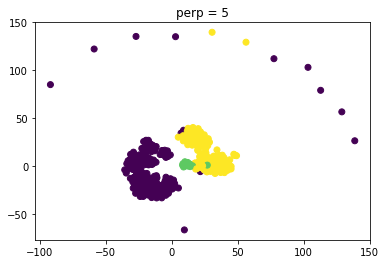

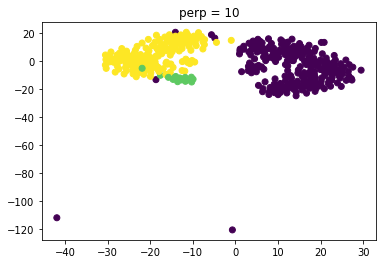

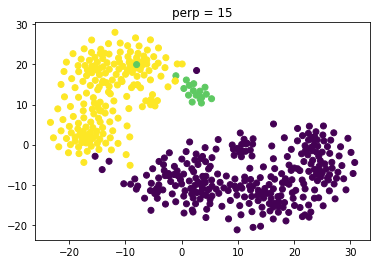

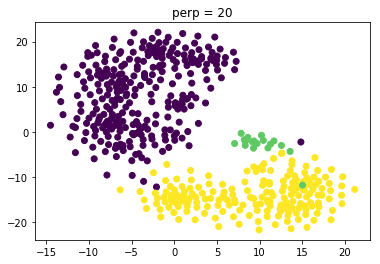

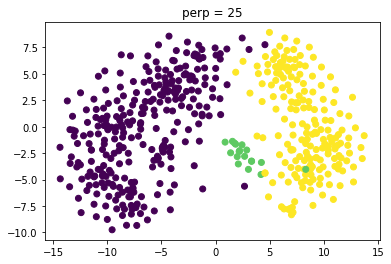

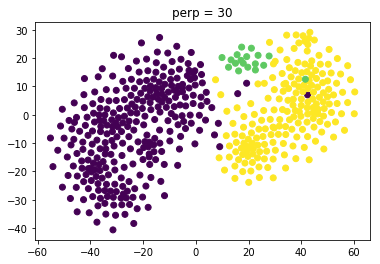

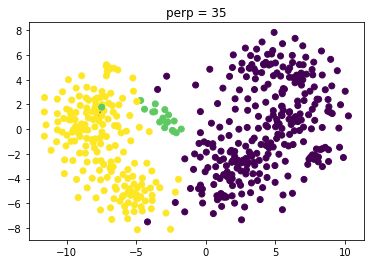

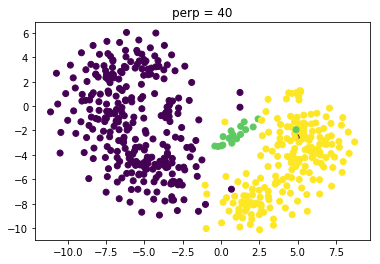

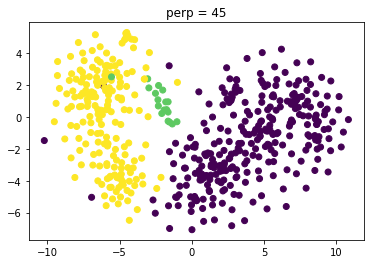

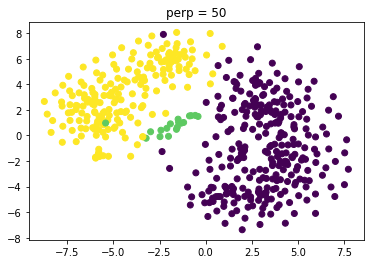

In [19]:
#loop through multiple perplexities
for i in range(10):
    #run tsne 
    tsne = TSNE(perplexity = (i+1)*5).fit_transform(counts.transpose()[1:500,:])
    
    #kmeans on tsne
    kmeans = KMeans(n_clusters = 7)
    kmeans.fit(tsne)
    color = kmeans.predict(tsne)

    #plot
    mpl.figure(i)
    mpl.title("perp = "+str((i+1)*5))
    mpl.scatter(tsne[:,0],tsne[:,1], c = r[1:500])
    mpl.show()

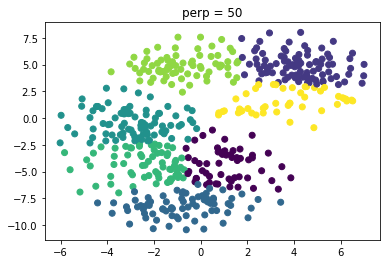

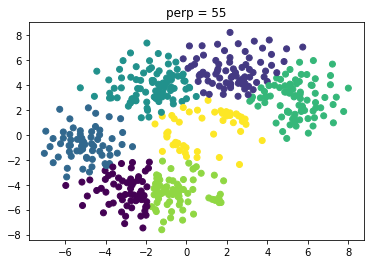

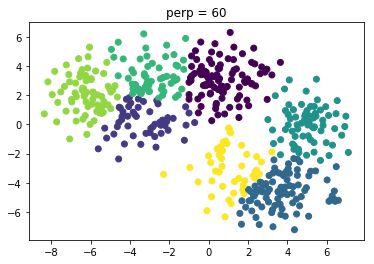

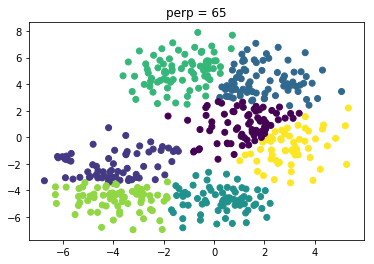

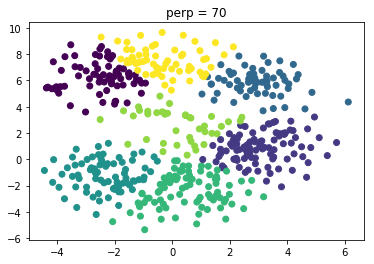

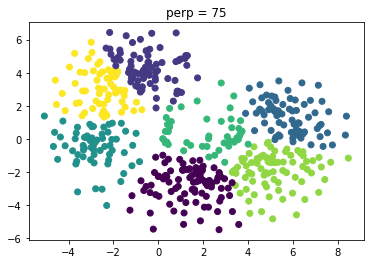

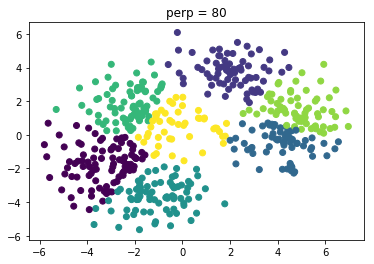

/Users/Diamond/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


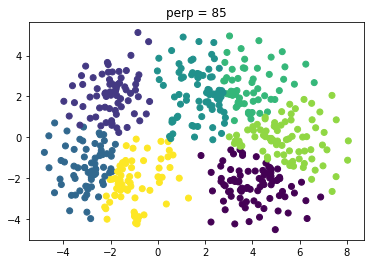

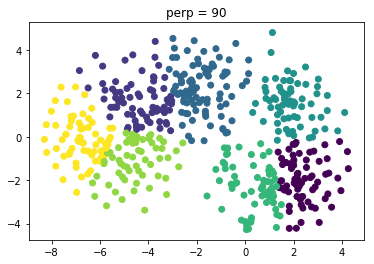

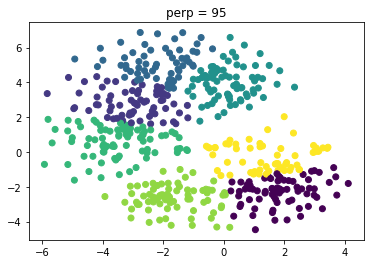

In [3]:
#loop through multiple perplexities
for i in range(10):
    #run tsne 
    tsne = TSNE(perplexity = (i+10)*5).fit_transform(counts.transpose()[1:500,:])
    
    #kmeans on tsne
    kmeans = KMeans(n_clusters = 7)
    kmeans.fit(tsne)
    color = kmeans.predict(tsne)

    #plot
    mpl.figure(i)
    mpl.title("perp = "+str((i+10)*5))
    mpl.scatter(tsne[:,0],tsne[:,1], c = color)
    mpl.show()

/Users/Diamond/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


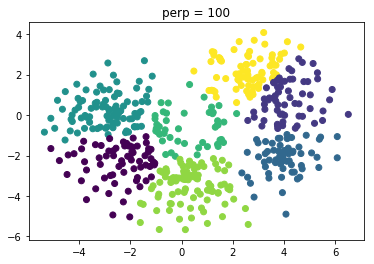

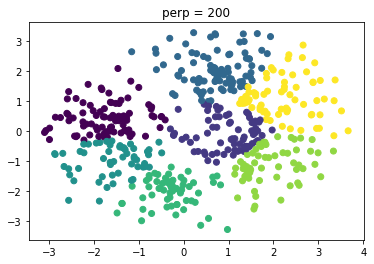

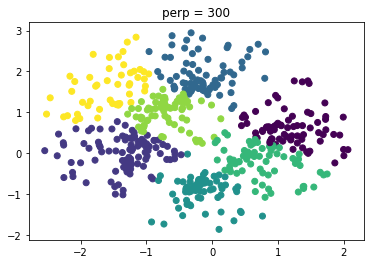

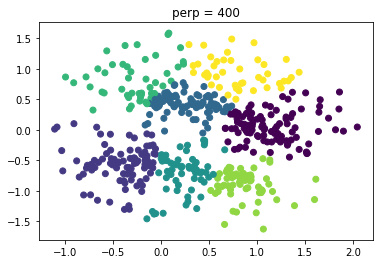

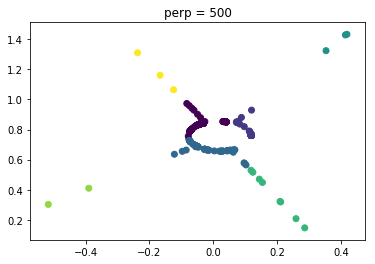

In [5]:
#loop through multiple perplexities
for i in range(5):
    #run tsne 
    tsne = TSNE(perplexity = (i+1)*100).fit_transform(counts.transpose()[1:500,:])
    #kmeans on tsne
    kmeans = KMeans(n_clusters = 7)
    kmeans.fit(tsne)
    color = kmeans.predict(tsne)

    #plot
    mpl.figure(i)
    mpl.title("perp = "+str((i+1)*100))
    mpl.scatter(tsne[:,0],tsne[:,1], c = color)
    mpl.show()

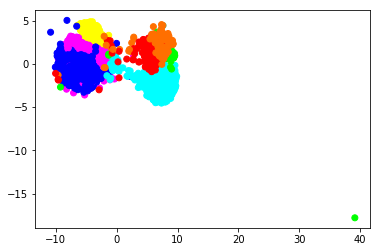

In [40]:
#tsne on all cells
tsne = TSNE(perplexity = 500).fit_transform(counts.transpose())

#kmeans on tsne
kmeans = KMeans(n_clusters = 7)
kmeans.fit(tsne)
color = kmeans.predict(tsne)

#plot
mpl.figure(2)
mpl.scatter(tsne[:,0],tsne[:,1], c = r)
mpl.show()

In [7]:
#run pca for 5 dimensions
pca = PCA(n_components = 5).fit_transform(counts.transpose())

In [8]:
#kmeans on top 5 PCs
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pca)
color = kmeans.predict(pca)

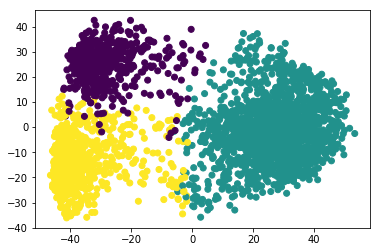

[1 1 1 ... 0 0 0]


In [15]:
#plot
mpl.figure(2)
mpl.scatter(pca[:,0],pca[:,1], c = color)
mpl.show()

print(color)